In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

In [269]:
data = pd.read_csv("/home/ankita/Downloads/Bike-Sharing-Dataset/day.csv")
data = data.drop(["instant", "dteday", "yr", "mnth", "weekday", "workingday", "atemp", "casual", "registered"], axis=1)

https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset

In [270]:
data.head()

,season,holiday,weathersit,temp,hum,windspeed,cnt
0,1,0,2,0.34,0.81,0.16,985
1,1,0,2,0.36,0.70,0.25,801
2,1,0,1,0.20,0.44,0.25,1349
3,1,0,1,0.20,0.59,0.16,1562
4,1,0,1,0.23,0.44,0.19,1600


features are independent

In [232]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 8 columns):
season        731 non-null int64
holiday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
temp          731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
cnt           731 non-null int64
dtypes: float64(3), int64(5)
memory usage: 45.8 KB


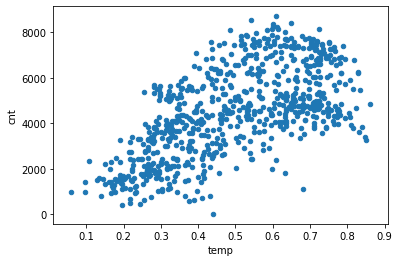

In [233]:
data.plot(x="temp", y="cnt", kind="scatter")

In [137]:
corr = data.corr()

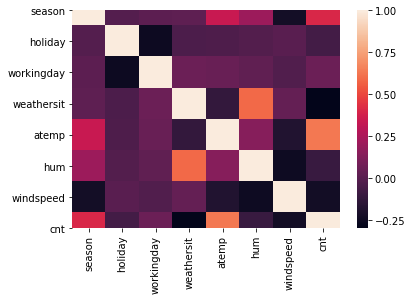

In [138]:
sns.heatmap(corr)

No extraordinarily high correlation. Features << Total count. Hence no need of Adjusted corr

Linear Model to predict the bike rentals on a day, given weather and calendrical info

In [234]:
onehotencoder = OneHotEncoder(categorical_features = [0, 3]) 
X = onehotencoder.fit_transform(data) 

data = pd.DataFrame.sparse.from_spmatrix(X)

data.columns = ["seasonWINTER", "seasonSPRING", "seasonSUMMER", "seasonFALL", "holiday", "workingday", "weatherCLEAR", "weatherMIST", "weatherLIGHTSNOW", "atemp", "hum", "windspeed", "count"]
data.head()

/home/ankita/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/ankita/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


,seasonWINTER,seasonSPRING,seasonSUMMER,seasonFALL,holiday,workingday,weatherCLEAR,weatherMIST,weatherLIGHTSNOW,atemp,hum,windspeed,count
0,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.34,0.81,0.16,985.00
1,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.36,0.70,0.25,801.00
2,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.20,0.44,0.25,1349.00
3,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.20,0.59,0.16,1562.00
4,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.23,0.44,0.19,1600.00


In [271]:
X = data.loc[:, "season":"windspeed"]
X.head()

,season,holiday,weathersit,temp,hum,windspeed
0,1,0,2,0.34,0.81,0.16
1,1,0,2,0.36,0.70,0.25
2,1,0,1,0.20,0.44,0.25
3,1,0,1,0.20,0.59,0.16
4,1,0,1,0.23,0.44,0.19


In [273]:
y = data["cnt"]
y

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 731, dtype: int64

In [274]:
model = LinearRegression()
linear_reg = model.fit(X, y)

In [275]:
linear_reg.score(X, y)

0.5213492722060229

In [276]:
linear_reg.intercept_

3478.0785174278353

In [277]:
LinRegCoeff = linear_reg.coef_
LinRegCoeff

array([  409.63955482,  -662.60756798,  -471.39825284,  5630.79832442,
       -2343.33221263, -3347.61669706])

In [278]:
pd.options.display.float_format = '{:.2f}'.format

In [279]:
weights = []

for i in range(0,100):
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.15)
   # print(X_train.head())
   # print(y_train.head())

    model = LinearRegression()
    linear_reg = model.fit(X_train, y_train)
    LinRegCoeff = linear_reg.coef_
    
    #print(LinRegCoeff)
    weights.append(LinRegCoeff)

In [254]:
y.loc[675]

5686.0

In [187]:
weights[1]

array([-3.05733003e+15, -3.05733003e+15, -3.05733003e+15, -3.05733003e+15,
       -2.76456739e+14, -2.76456739e+14, -2.76456739e+14, -6.19490554e+02,
        1.06662631e+02,  6.71160658e+03, -2.70188302e+03, -3.26229039e+03])

In [280]:
weights_df = pd.DataFrame(np.vstack(weights), columns=X.columns)
weights_df.head()

,season,holiday,weathersit,temp,hum,windspeed
0,421.65,-651.21,-470.60,5659.84,-2219.33,-3250.40
1,401.05,-682.14,-463.49,5950.56,-2381.55,-3530.99
2,405.79,-774.99,-545.12,5689.77,-2216.63,-3252.35
3,383.82,-817.15,-573.10,5663.62,-2046.68,-3342.38
4,429.49,-607.05,-520.27,5534.22,-2267.15,-3115.50


In [281]:
weights_df.describe()

,season,holiday,weathersit,temp,hum,windspeed
count,100.00,100.00,100.00,100.00,100.00,100.00
mean,404.35,-656.56,-469.68,5629.53,-2332.14,-3347.28
std,20.22,120.55,60.17,130.33,229.13,298.31
min,335.36,-946.41,-591.82,5373.67,-3362.58,-4203.64
25%,390.28,-721.17,-506.49,5546.13,-2437.91,-3549.75
50%,402.83,-666.71,-480.57,5605.54,-2300.14,-3330.98
75%,419.31,-575.77,-447.27,5701.96,-2205.55,-3146.22
max,460.18,-338.15,-271.41,6110.27,-1877.93,-2700.50


In [266]:
weights_df.columns

Index(['atemp', 'hum', 'windspeed'], dtype='object')

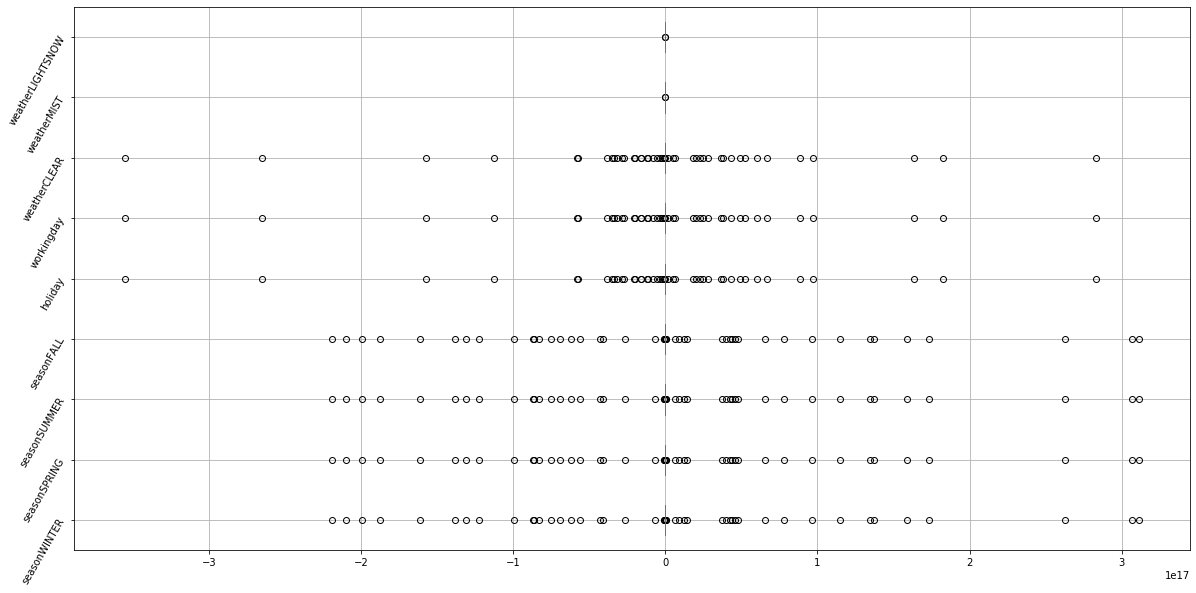

In [169]:
weights_df.boxplot(column=['seasonWINTER', 'seasonSPRING', 'seasonSUMMER', 'seasonFALL', 'holiday',
       'workingday', 'weatherCLEAR', 'weatherMIST', 'weatherLIGHTSNOW'], rot=60, figsize=(20, 10), vert=False)

In [127]:
d[d.iloc[:]["weatherCLEAR"]==1]

/home/ankita/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:2418: FutureWarning: DataFrame/Series.to_dense is deprecated and will be removed in a future version
  result = result.to_dense()


,seasonWINTER,seasonSPRING,seasonSUMMER,seasonFALL,holiday,workingday,weatherCLEAR,weatherMIST,weatherLIGHTSNOW,atemp,hum,windspeed
25,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.203600,0.862500,0.293850
68,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.385668,0.000000,0.261877
89,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.257575,0.918333,0.217646
105,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.425492,0.888333,0.340808
248,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.515200,0.886957,0.343943
249,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.544229,0.917083,0.097021
250,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.555361,0.939565,0.192748
284,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.517717,0.906250,0.248150
291,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.513848,0.895217,0.243339
301,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.227913,0.882500,0.351371
